# DS102 Statistical Programming in R : Lesson Eight - Linear Regression

## Directions
For your Lesson 8 Hands-On, use the `mtcars` data frame to examine the effect that engine horsepower (`hp`) and vehicle weight (`wt`), measured in thousands of pounds) have on the time necessary to travel one quarter mile from a standing start (`qsec`). Use this information to answer the below questions. 


## Requirements

1. Create a scatter plot with a trend line where the horizontal axis is engine horsepower and the vertical axis is quarter mile time. What is the relationship between time and engine horsepower: positively correlated, negatively correlated, or uncorrelated? 

2. Compute the linear regression for time and engine horsepower.  What is the equation of the line? What is the R-squared value? Is this what you would expect?

3. Create a scatter plot with a trend line where the horizontal axis is vehicle weight and the vertical axis is quarter mile time. What is this relationship: positively correlated, negatively correlated, or uncorrelated? 

4. Compute the linear regression for these two variables. What is the equation of the line? What is the R-squared value? Is this what you would expect?

5. Create a report (MS Powerpoint or equivalent) that shows your results and the code you used to generate the results. Please include your interpretation of the data included and answer all the questions posed above. 

---

# Install Packages

In [2]:
library(ggplot2)

# Look at the Data

In [17]:
# Looks like its already a dataframe, so we are good to go on structure of dataset
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


# Scatter Plot 

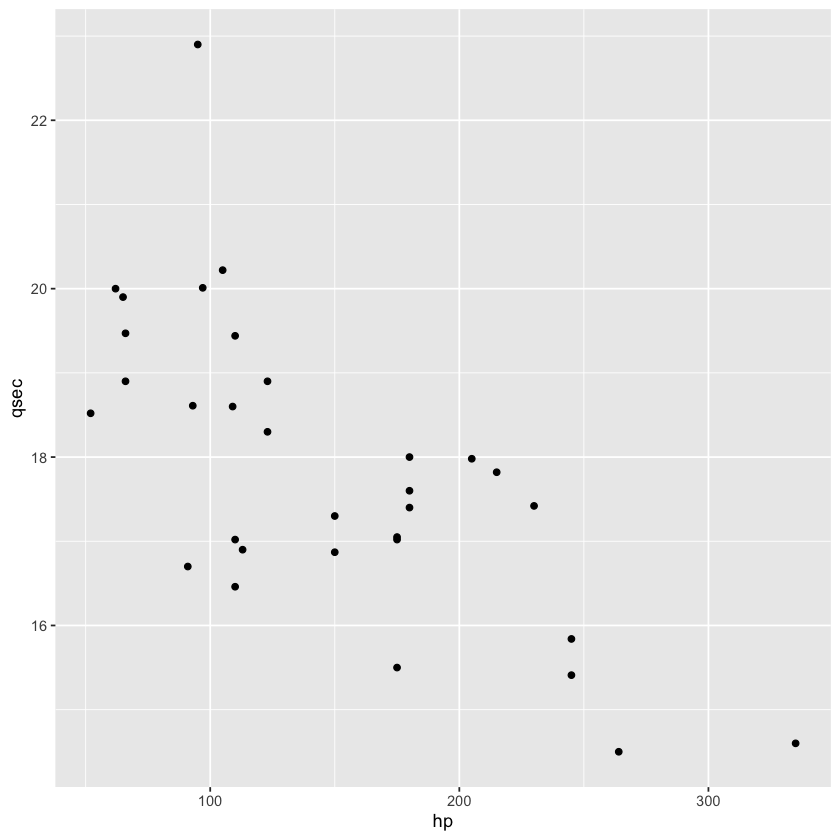

In [18]:
# Create a scatter plot with a trend line where the horizontal axis is engine horsepower 
# and vertical axis is quarter mile time. 
# What is the relationship between time and engine horsepower: 
# positively correlated, negatively correlated, or uncorrelated?


mtcars1 <- ggplot(mtcars, aes(x = hp, y = qsec))
mtcars1 + geom_point()

# Label Scatter Plot

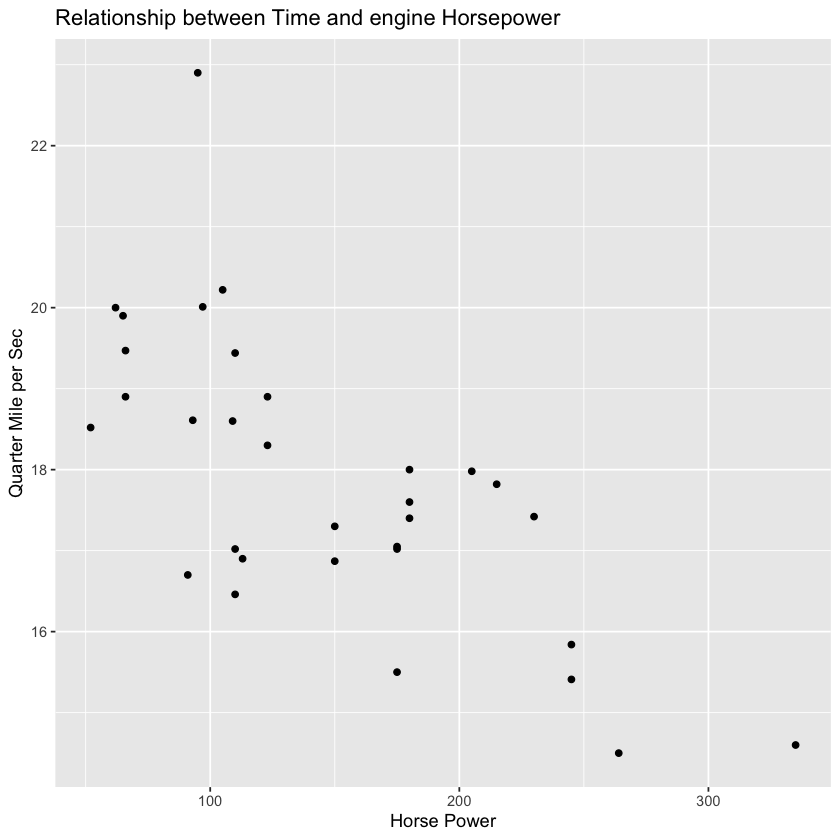

In [19]:
mtcars2 <- ggplot(mtcars, aes(x = hp, y = qsec))
mtcars2 + geom_point() + 

ggtitle("Relationship between Time and engine Horsepower") +
xlab("Horse Power") + 
ylab("Quarter Mile per Sec")

# Add line to Scatter Plot

`geom_smooth()` using formula 'y ~ x'



ERROR: Error in ggtitle("Relationship between Time and engine Horsepower") + : non-numeric argument to binary operator


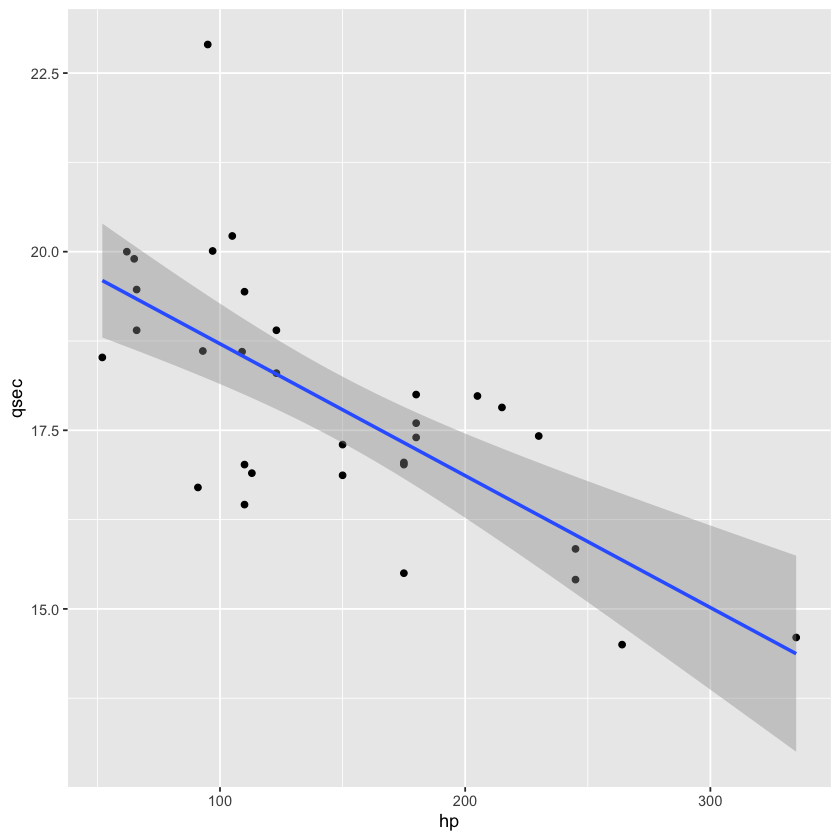

In [22]:
mtcars3 <- ggplot(mtcars, aes(x = hp, y = qsec))
mtcars3 + geom_point() + geom_smooth(method=lm)
ggtitle("Relationship between Time and engine Horsepower") +
xlab("Horse Power") + 
ylab("Quarter Mile per Sec")

# add agrument: `method=lm`

# Delete Margin of Error

`geom_smooth()` using formula 'y ~ x'



ERROR: Error in ggtitle("Relationship between Time and engine Horsepower") + : non-numeric argument to binary operator


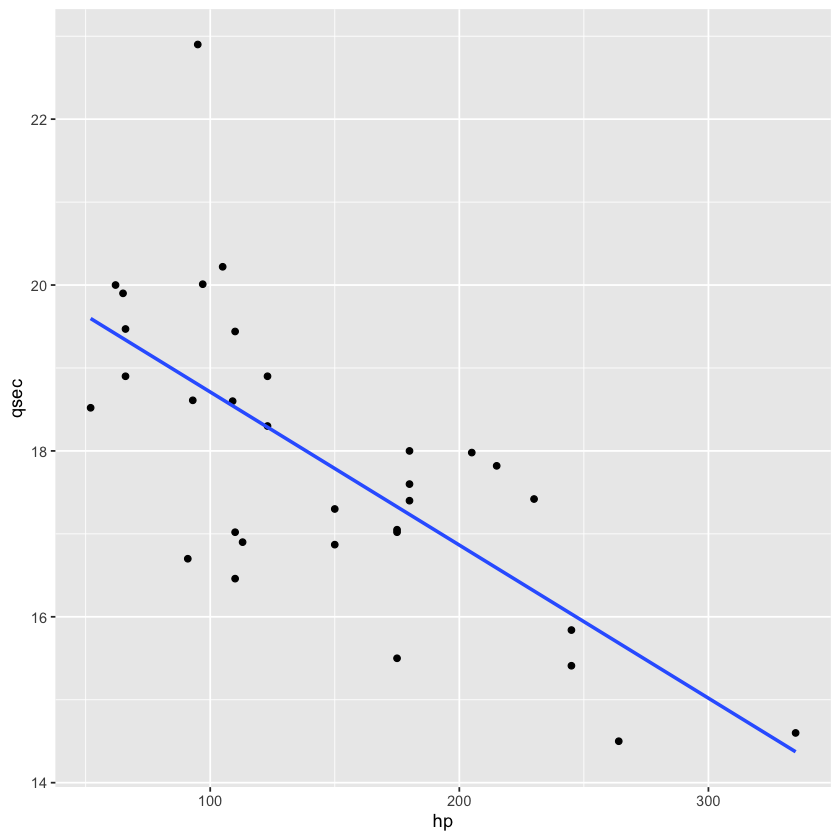

In [23]:
mtcars4 <- ggplot(mtcars, aes(x = hp, y = qsec))
mtcars4 + geom_point() + geom_smooth(method=lm, se=FALSE)
ggtitle("Relationship between Time and engine Horsepower") +
xlab("Horse Power") + 
ylab("Quarter Mile per Sec")

# add agrument: `se=FALSE`

# Add color

`geom_smooth()` using formula 'y ~ x'



ERROR: Error in ggtitle("Relationship between Time and engine Horsepower") + : non-numeric argument to binary operator


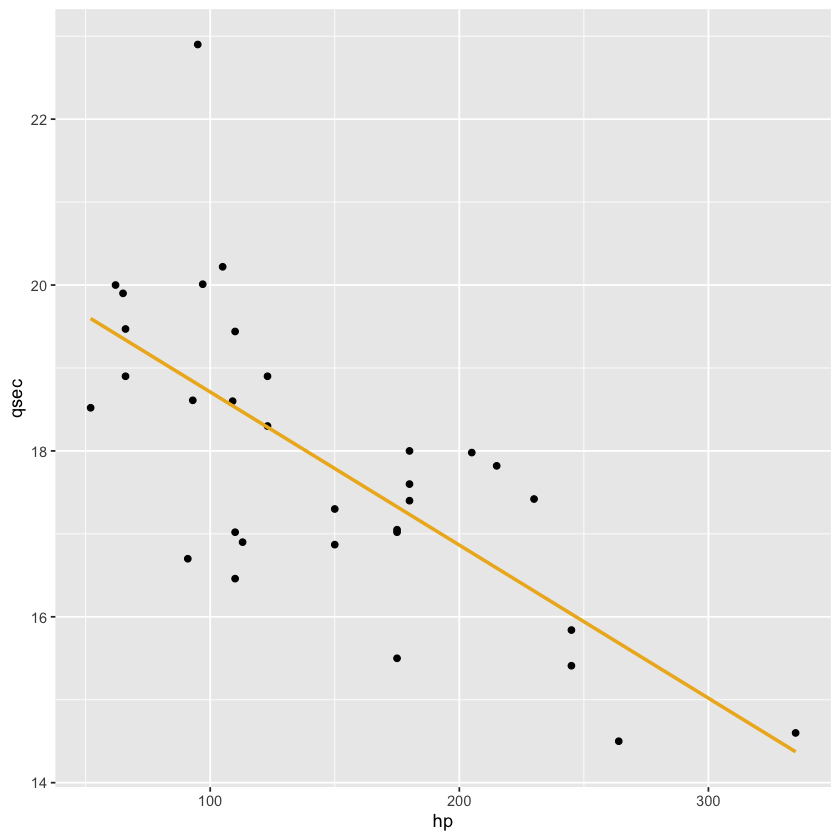

In [27]:
mtcars5 <- ggplot(mtcars, aes(x = hp, y = qsec))
mtcars5 + geom_point() + geom_smooth(method=lm, se=FALSE, color = "goldenrod2")
ggtitle("Relationship between Time and engine Horsepower") +
xlab("Horse Power") + 
ylab("Quarter Mile per Sec")

# add agrument: `color = "goldenrod2"`

# Correlations:

## Types of Correlations

There are different "flavors" of correlations for different situations.  They are all interpreted the same way, but are calculated differently behind the scenes in R, to make sure that they are as accurate as possible. 

The three main types of correlations you will learn about are: 

* **Pearson's *R*:** For two normally distributed, continuous variables 
* **Spearman's Rho:** For two non-normally distributed continuous variables 
* **Kendall's Tau:** For two categorical variables

<div class="panel panel-info">
    <div class="panel-heading">
        <h3 class="panel-title">Tip!</h3>
    </div>
    <div class="panel-body">
        <p>A correlation will ALWAYS be between two variables, no more, no less, no matter which type of correlation you're using!</p>
    </div>
</div>


## Strength of Correlations

Not only can you judge a correlation by its type, but also by it's strength.  
* **Strong correlation** forms a very tight grouping of dots to make a line
* **Moderate correlation** will have the rough shape of a line, but the dots will be a bit more spread out  
* **Weak correlation** shows a very general trend

## cor.test() 

The simplest way to find a correlation is to make use of the ```cor.test()``` function. You will select the two variables you want to correlate; with ```cor.test()``` you can only do two variables at a time. Here is the code: 

```{r}
cor.test(mtcars$hp, mtcars$cyl, method="pearson", use = "complete.obs")
```

This runs ```cor.test``` on the ```mtcars``` dataset variables of ```hp``` and ```cyl```.  You will use the ```method=``` argument to specify ```"pearson"``` if you have two continuous variables that are normally distributed.  If, however, you have two continuous variables that are NOT normally distributed (this is called *non-parametric*), then you will use the argument ```"spearman"```, which will conduct the non-parametric correlation *Spearman's Rho*, pronounced "row." If you had two categorical variables that are numeric or have been recoded to numeric, then you can make use of the argument ```"kendall"```, which conducts the test *Kendall's Tau*, pronounced like "ow!" with a "t" on the front, or the beginning of "tower." 

The ```use=``` function with the argument ```"complete.obs"``` means that you don't have to have a complete dataset; R will use what it has, as long as it has data for the two variables you are trying to correlate.

# Computing Linear Regression

In [28]:
lin_reg <- lm(hp ~ qsec, mtcars)
print(lin_reg)


Call:
lm(formula = hp ~ qsec, data = mtcars)

Coefficients:
(Intercept)         qsec  
     631.70       -27.17  



# Our Liner Equation
y = -27.17x + 631.70

- y= y-value
- m= slope
- x= x-value
- b= y-intercept 

# Linear Regression Model Summary

In [29]:
summary(lin_reg)


Call:
lm(formula = hp ~ qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.903 -33.629   5.336  27.925 100.032 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  631.704     88.700   7.122 6.38e-08 ***
qsec         -27.174      4.946  -5.495 5.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.2 on 30 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.485 
F-statistic: 30.19 on 1 and 30 DF,  p-value: 5.766e-06


## Is the Overall Model Significant?

The first thing you will want to look for is the ```F-statistic``` and ```p-value```, at the very bottom.  These tell you if the overall model is significant.  What is meant by that? If the overall model is significant, it means that your x value (or x values, in the case of multiple regression) are a significant predictor of your y value. If the the *p* value isn't significant at *p* < .05 at the very least, then the rest of the output really isn't worth looking at.  You didn't find anything interesting to talk about or report!

## How Much Variance is Explained by this Model?

Next, move down to the ```Multiple R-squared``` and ```Adjusted R-squared``` rows.  These both mean the same thing, but the second one is adjusted for the number of variables in the model, in order to reduce the amount of Type I error that may abound. As a general rule, looking at ```Adjusted R-squared``` is the more prudent thing to do. The R-squared value is also called the *coefficient of determination*. It is a measure of the percentage of the variability of the data set that the line explains. In this case, because the Adjusted R-squared value is 0.485, the line explains approximately 49% of the variability of the data. Put another way, this means that speed is able to explain about 49% of the factors that go into stopping distance.  The rest is covered by other variables that have not been included in the model. The larger the R-Squared value, the more closely related the variables in the model are.

# Using Linear Regression to Predict Values

You can use this model to predict the necessary `qsec` for per `hp`. For example, suppose you want to know the `qsec` for a car traveling at 21 `hp`. You could put `21 into the x value`of the regression equation you computed above, and you can solve for y to get the predicted stopping distance.

In [35]:
#y = mx + b
y = (-27.17 * 21) + 631.70
y

[1] 61.13

So your model predicts that a car going 21 `hp` will require 61.13 `qsec`. You can describe what you have done graphically as well. In the image below, to find the predicted stopping distance at 21 `hp`, you go up from the x axis at a value of 21 until you reach the regression line. Then, you go horizontally left to the y axis and read the value, which would be 61.13.

# Scatter Plot with a Best Fit Line

`geom_smooth()` using formula 'y ~ x'



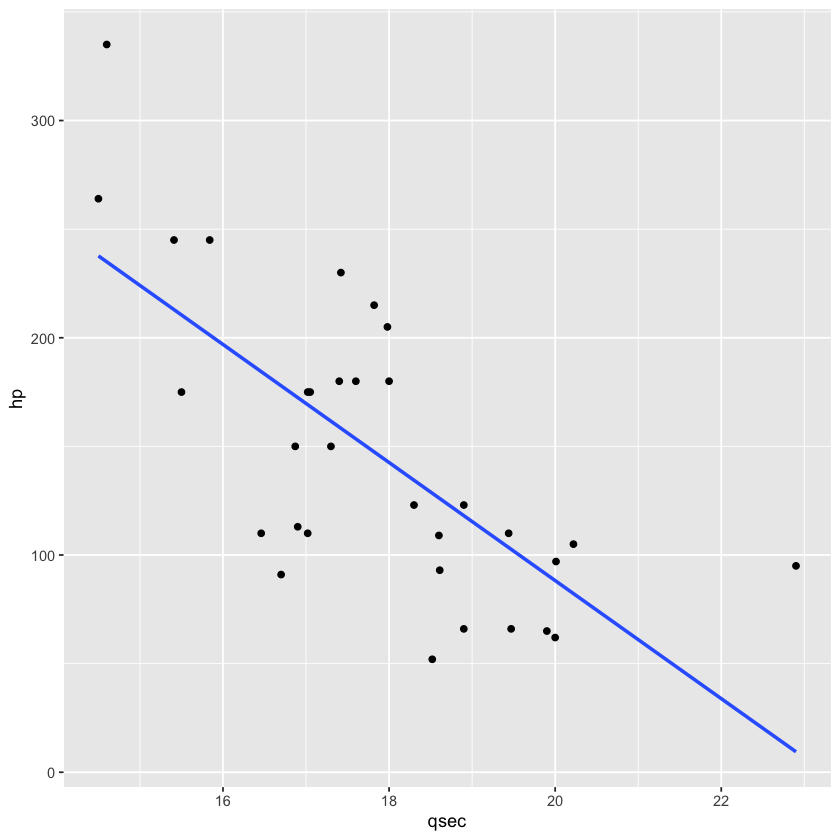

In [36]:
mtcars6 <- ggplot(mtcars, aes(x = qsec, y = hp))
mtcars6 + geom_point() + geom_smooth(method=lm, se=FALSE)